# Phase 2: Analytics & Visual Insights

In this phase, I explore patterns in seller performance, complaints, returns, delivery methods, and customer ratings to uncover actionable business insights for AfriMarket.

I will:
- Identify top and bottom-performing sellers
- Detect complaint and return hotspots
- Analyze the impact of delivery methods on customer satisfaction
- Support decision-making for suspension, improvement, or praise

### Load Cleaned Data

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned files
df = pd.read_csv("../cleaned/cleaned_orders.csv")
seller_summary = pd.read_csv("../cleaned/seller_summary.csv")

In [4]:
# Preview
df.head()

,order_id,order_date,dispatch_date,delivery_date,seller_id,product_category,price,quantity,warehouse_zone,customer_rating,...,delivery_delay,is_late,order_value,has_complaint,low_rating,review_length,sentiment_label,seller_return_rate,seller_complaint_rate,seller_risk_score
0,O00000,2025-05-28,2025-05-30,2025-06-06,S033,Fashion,193.52,1.0,Kano,4.0,...,7,1,193.52,1,0,50,Positive,0.041667,1.0,0.520833
1,O00001,2025-06-24,2025-06-26,2025-07-03,S018,Groceries,86.45,3.0,Lagos,3.0,...,7,1,259.35,1,0,50,Positive,0.050000,1.0,0.525000
2,O00006,2025-05-15,2025-05-17,2025-05-21,S034,Health,491.78,1.0,Accra,4.0,...,4,1,491.78,1,0,40,Neutral,0.050000,1.0,0.525000
3,O00007,2025-05-18,2025-05-19,2025-05-22,S015,Groceries,93.56,3.0,Kumasi,5.0,...,3,1,280.68,1,0,37,Neutral,0.000000,1.0,0.500000
4,O00008,2025-06-11,2025-06-11,2025-06-20,S042,Toys,286.01,2.0,Kumasi,1.0,...,9,1,572.02,1,1,49,Positive,0.000000,1.0,0.500000


In [5]:
# preview 
seller_summary.head()

,seller_id,total_orders,avg_delay,late_delivery_rate,complaint_rate,low_rating_rate,return_rate,avg_rating,total_revenue,avg_price,seller_return_rate,seller_complaint_rate,seller_risk_score
0,S001,16,4.937500,0.875000,1.0,0.312500,0.000000,3.187500,11655.54,272.522500,0.000000,1.0,0.500000
1,S002,21,4.047619,0.904762,1.0,0.142857,0.000000,3.666667,12013.85,217.082857,0.000000,1.0,0.500000
2,S003,18,4.833333,0.888889,1.0,0.277778,0.000000,3.444444,10722.06,242.567778,0.000000,1.0,0.500000
3,S004,12,3.083333,0.916667,1.0,0.166667,0.083333,3.583333,6606.36,211.625000,0.083333,1.0,0.541667
4,S005,27,5.222222,0.962963,1.0,0.185185,0.037037,3.333333,18272.63,271.105926,0.037037,1.0,0.518519


### Top & Bottom Sellers by Rating

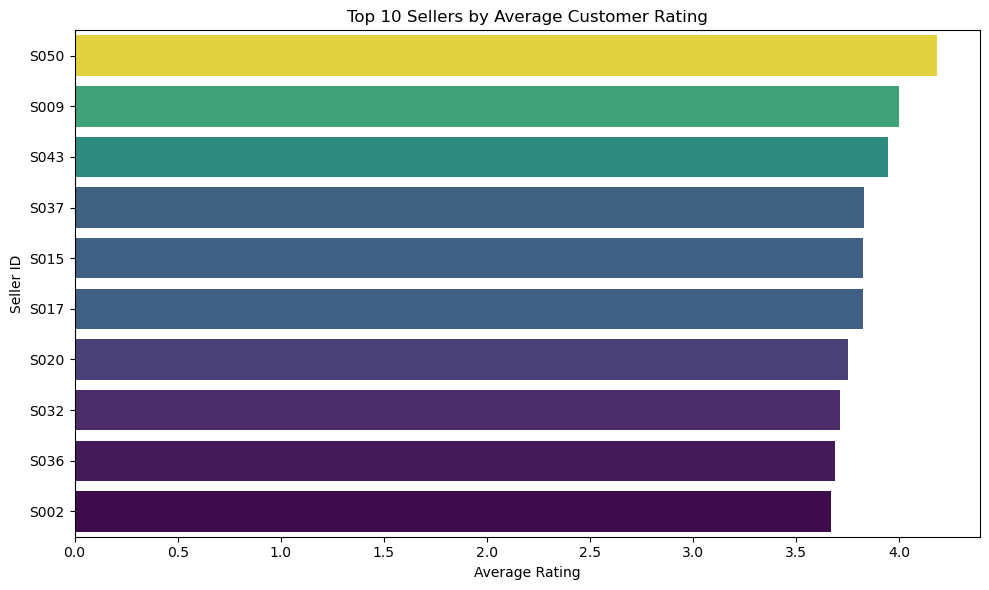

In [46]:
# Top 10 sellers
top_sellers = seller_summary.sort_values(by='avg_rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_sellers, 
    x='avg_rating', 
    y='seller_id', 
    hue='avg_rating', 
    palette='viridis', 
    legend=False
)

plt.title("Top 10 Sellers by Average Customer Rating")
plt.xlabel("Average Rating")
plt.ylabel("Seller ID")
plt.tight_layout()

plt.savefig("../visuals/charts/top_sellers.png")
plt.show()

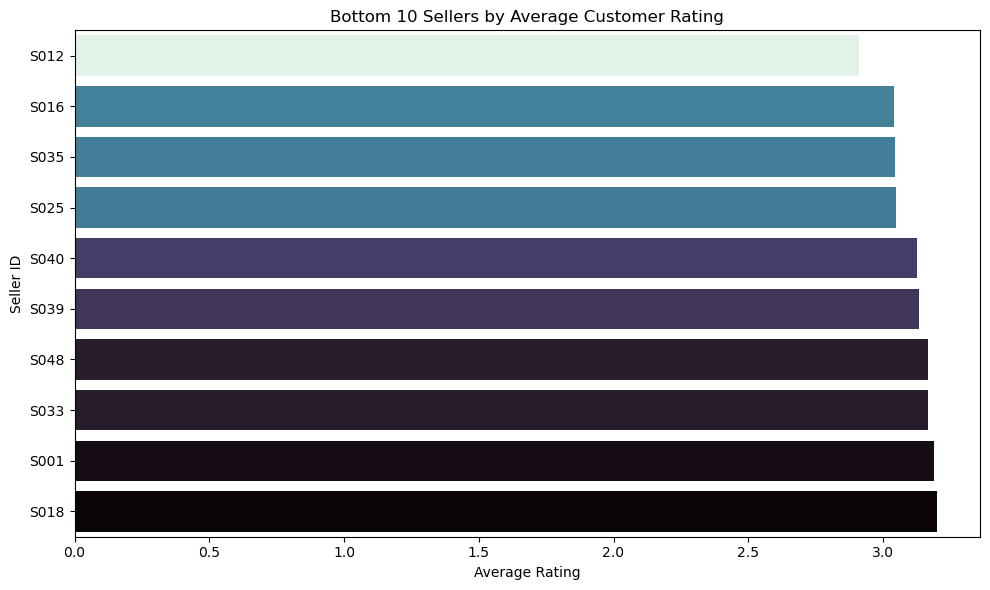

In [47]:
# Bottom 10 sellers
bottom_sellers = seller_summary.sort_values(by='avg_rating', ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=bottom_sellers, 
    x='avg_rating', 
    y='seller_id', 
    hue='avg_rating', 
    palette='mako_r', 
    legend=False
)

plt.title("Bottom 10 Sellers by Average Customer Rating")
plt.xlabel("Average Rating")
plt.ylabel("Seller ID")
plt.tight_layout()

plt.savefig("../visuals/charts/bottom_sellers.png")
plt.show()

### Hotspot Analysis

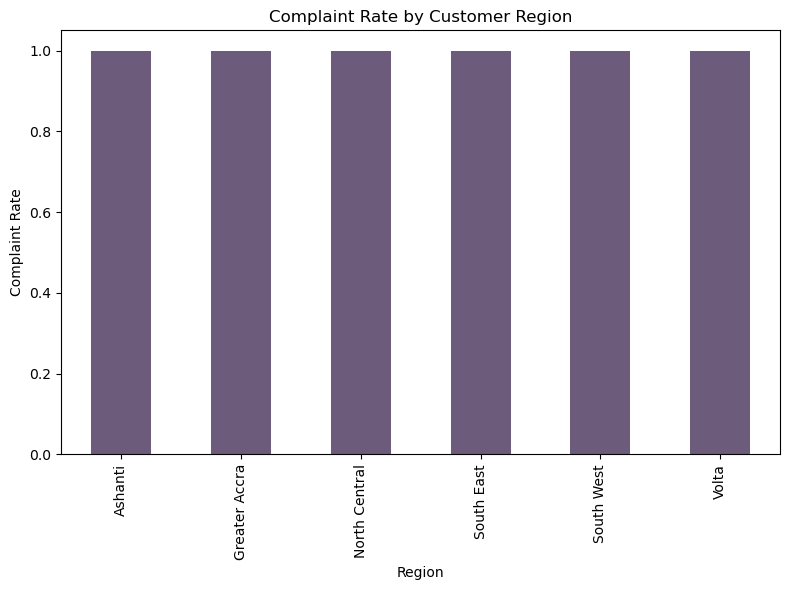

In [48]:
#Complaint Rate by Region
region_complaints = df.groupby('customer_region')['has_complaint'].mean().sort_values(ascending=False)

region_complaints.plot(
    kind='bar', 
    color='#6C5B7B', 
    figsize=(8,6)
)

plt.title("Complaint Rate by Customer Region")
plt.ylabel("Complaint Rate")
plt.xlabel("Region")
plt.tight_layout()

plt.savefig("../visuals/charts/complaints_by_region.png")
plt.show()

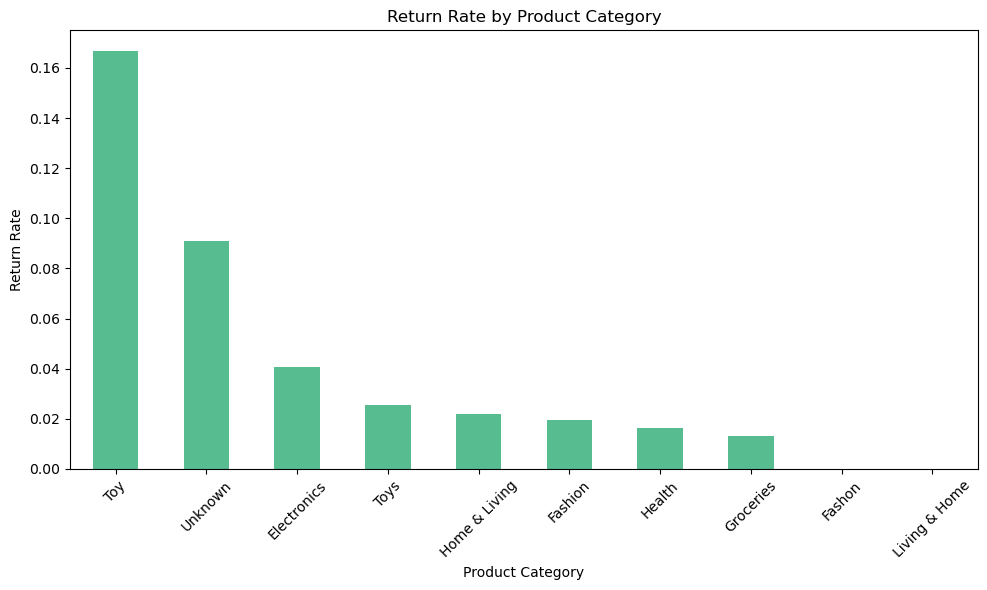

In [49]:
# Return Rate by Product Category
return_by_category = df.groupby('product_category')['return_flag'].mean().sort_values(ascending=False)

return_by_category.plot(
    kind='bar', 
    color='#57BC90', 
    figsize=(10,6)
)

plt.title("Return Rate by Product Category")
plt.ylabel("Return Rate")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("../visuals/charts/returns_by_category.png")
plt.show()

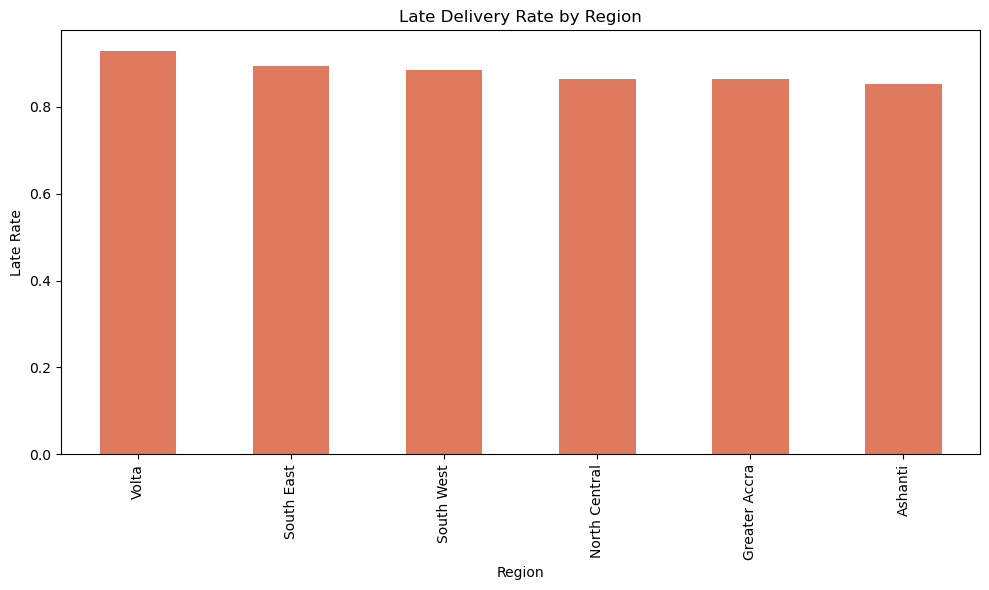

In [50]:
# Late Delivery Rate by Region
late_by_region = df.groupby('customer_region')['is_late'].mean().sort_values(ascending=False)

late_by_region.plot(
    kind='bar', 
    color='#E07A5F', 
    figsize=(10,6)
)

plt.title("Late Delivery Rate by Region")
plt.ylabel("Late Rate")
plt.xlabel("Region")
plt.tight_layout()

plt.savefig("../visuals/charts/late_by_region.png")
plt.show()

### Hypothesis Validation

In [62]:
# Average customer rating grouped by delivery method
df.groupby('delivery_method')['customer_rating'].mean().sort_values(ascending=False)

delivery_method
Standard    3.512048
Express     3.413374
Pickup      3.392638
Name: customer_rating, dtype: float64

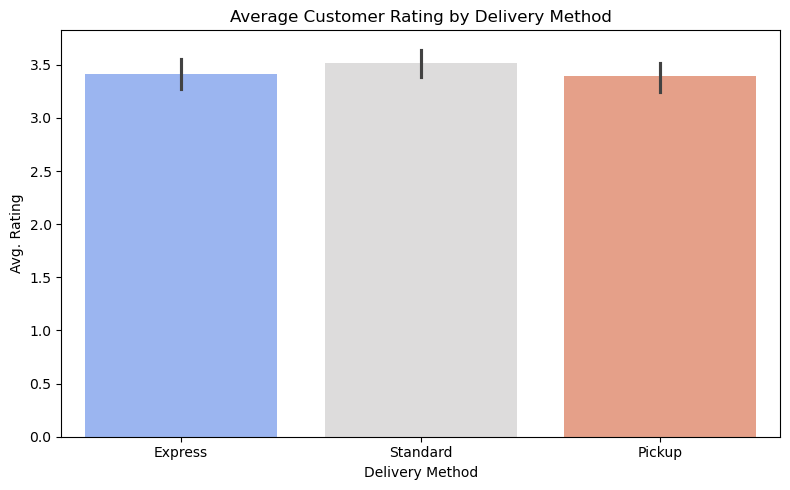

In [63]:
# plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=df, 
    x='delivery_method', 
    y='customer_rating',
    hue='delivery_method',
    palette='coolwarm',
    legend=False
)

plt.title('Average Customer Rating by Delivery Method')
plt.xlabel('Delivery Method')
plt.ylabel('Avg. Rating')
plt.tight_layout()

plt.savefig("../visuals/charts/delivery_method_rating.png")
plt.show()

___

## Phase 2 Summary: Analytics & Visual Insights

> In this phase, I explored seller performance, complaints, delays, and returns.
...

---
### Seller Analysis
- Among sellers with sufficient activity, high ratings tend to align with low complaint and return rates. A few outliers with limited orders may distort this trend..
- Bottom sellers had low ratings and high complaint/return rates.

> This trend reinforces the need for strong seller quality control, as performance metrics directly align with customer satisfaction.
...

---
### Hotspot Insights
- Complaint hotspots were found in **Ashanti**, **Greater Accra**, and **South West**
- Return issues were high in **Toy** and **Electronics** categories
- A notable portion of returns also came from poorly labeled items (marked as "Unknown")
- Late deliveries spiked in **Volta**, **South East**, and **South West**
...

---
### Delivery Method Impact
  Hypothesis confirmed — Delivery method **does** affect customer ratings.

> While differences are modest, Standard delivery consistently earns higher customer satisfaction scores, suggesting customers value reliability over speed or self-service pickup.
